In [148]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [149]:
data = pd.read_csv('Merged_Dataset.csv')

In [150]:
for i in data.columns:
    print(i)

year
state
state_po
county
dem
gop
total
POPESTIMATE
POPEST_MALE
POPEST_FEM
UNDER5_TOT
UNDER5_MALE
UNDER5_FEM
AGE513_TOT
AGE513_MALE
AGE513_FEM
AGE1417_TOT
AGE1417_MALE
AGE1417_FEM
AGE1824_TOT
AGE1824_MALE
AGE1824_FEM
AGE16PLUS_TOT
AGE16PLUS_MALE
AGE16PLUS_FEM
AGE18PLUS_TOT
AGE18PLUS_MALE
AGE18PLUS_FEM
AGE1544_TOT
AGE1544_MALE
AGE1544_FEM
AGE2544_TOT
AGE2544_MALE
AGE2544_FEM
AGE4564_TOT
AGE4564_MALE
AGE4564_FEM
AGE65PLUS_TOT
AGE65PLUS_MALE
AGE65PLUS_FEM
AGE04_TOT
AGE04_MALE
AGE04_FEM
AGE59_TOT
AGE59_MALE
AGE59_FEM
AGE1014_TOT
AGE1014_MALE
AGE1014_FEM
AGE1519_TOT
AGE1519_MALE
AGE1519_FEM
AGE2024_TOT
AGE2024_MALE
AGE2024_FEM
AGE2529_TOT
AGE2529_MALE
AGE2529_FEM
AGE3034_TOT
AGE3034_MALE
AGE3034_FEM
AGE3539_TOT
AGE3539_MALE
AGE3539_FEM
AGE4044_TOT
AGE4044_MALE
AGE4044_FEM
AGE4549_TOT
AGE4549_MALE
AGE4549_FEM
AGE5054_TOT
AGE5054_MALE
AGE5054_FEM
AGE5559_TOT
AGE5559_MALE
AGE5559_FEM
AGE6064_TOT
AGE6064_MALE
AGE6064_FEM
AGE6569_TOT
AGE6569_MALE
AGE6569_FEM
AGE7074_TOT
AGE7074_MALE
AGE7074_FEM

In [151]:
turnout = data.loc[:,['year','state','state_po','county','total','dem','gop','AGE18PLUS_TOT']]

In [152]:
turnout.to_csv('turnout.csv')

In [153]:
turnout_by_state = pd.DataFrame(turnout.groupby(['state','year']).sum())
turnout_by_state['turnout']=turnout_by_state['total']/turnout_by_state['AGE18PLUS_TOT']
tbs_toplot = pd.DataFrame(turnout_by_state['turnout'].unstack())
tbs_toplot.columns=['2012','2016','2020']
tbs_toplot['2020dif'] = tbs_toplot['2020']-tbs_toplot['2016']
tbs_toplot = tbs_toplot.sort_values('2020dif')
tbs_toplot['winner'] = ['red','blue','red','red','blue','blue','blue','blue']
tbs_toplot1 = tbs_toplot.iloc[:4]
tbs_toplot2 = tbs_toplot.iloc[4:]
tbs_toplot2

,2012,2016,2020,2020dif,winner
state,,,,,
Pennsylvania,0.572656,0.605064,0.679383,0.074319,blue
Michigan,0.620508,0.618732,0.706141,0.087410,blue
Georgia,0.525798,0.527974,0.616067,0.088093,blue
Arizona,0.465601,0.490831,0.600391,0.109560,blue


In [154]:
turnout_by_state.to_csv('turnout_by_state')

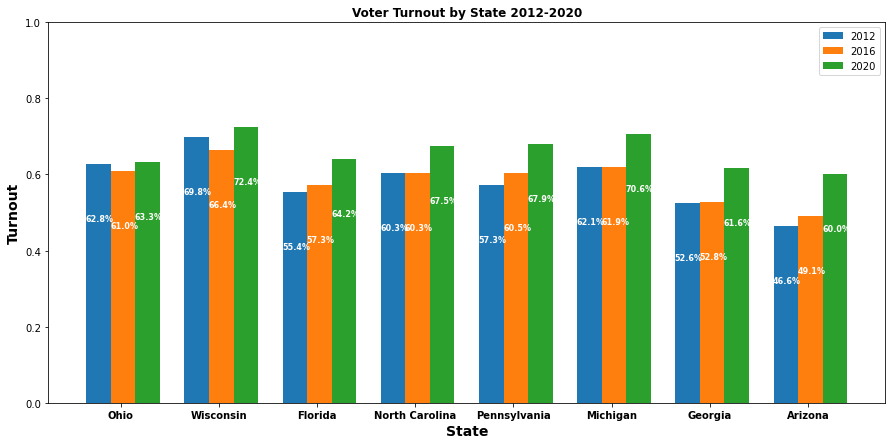

In [166]:
fig, ax = plt.subplots(figsize=(15,7))
x = np.arange(8)
rec1 = ax.bar(x,tbs_toplot['2012'],width=0.25,label='2012')
rec2 = ax.bar(x+0.25,tbs_toplot['2016'],width=0.25,label='2016')
rec3 = ax.bar(x+0.5,tbs_toplot['2020'],width=0.25,label='2020')
ax.set_xticks([r +.225 for r in range(8)])
ax.set_xticklabels(tbs_toplot.index,fontweight='bold')
ax.set_title('Voter Turnout by State 2012-2020',fontweight='bold')
ax.set_ylim([0,1])
ax.set_xlabel('State',fontsize=14,fontweight='bold')
ax.set_ylabel('Turnout',fontsize=14,fontweight='bold')
ax.legend()

for i,v in enumerate(tbs_toplot['2012']):
    ax.text(i-0.13, v-0.15, str(round(v*100,1))+'%', color='white',fontsize=8, fontweight='bold')

for i,v in enumerate(tbs_toplot['2016']):
    ax.text(i-0.13+0.25, v-0.15, str(round(v*100,1))+'%', color='white',fontsize=8,fontweight='bold')

for i,v in enumerate(tbs_toplot['2020']):
    ax.text(i-0.13+0.5, v-0.15, str(round(v*100,1))+'%', color='white',fontsize=8,fontweight='bold')

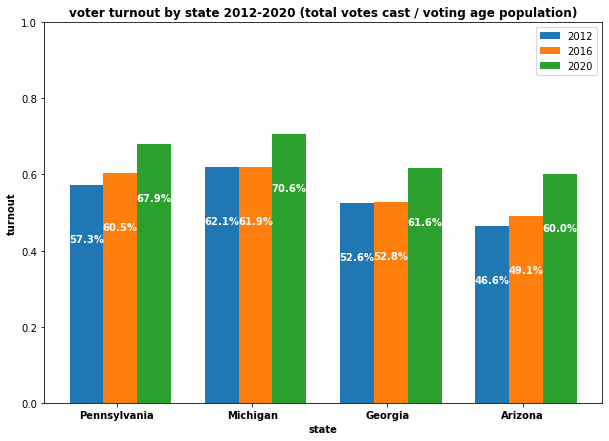

In [8]:
fig, ax = plt.subplots(figsize=(10,7))
x = np.arange(4)
rec1 = ax.bar(x,tbs_toplot2['2012'],width=0.25,label='2012')
rec2 = ax.bar(x+0.25,tbs_toplot2['2016'],width=0.25,label='2016')
rec3 = ax.bar(x+0.5,tbs_toplot2['2020'],width=0.25,label='2020')
ax.set_xticks([r +.225 for r in range(4)])
ax.set_xticklabels(tbs_toplot2.index,fontweight='bold')
ax.set_title('voter turnout by state 2012-2020 (total votes cast / voting age population)',fontweight='bold')
ax.set_ylim([0,1])
ax.set_xlabel('state',fontweight='bold')
ax.set_ylabel('turnout',fontweight='bold')
ax.legend()

for i,v in enumerate(tbs_toplot2['2012']):
    ax.text(i-0.13, v-0.15, str(round(v*100,1))+'%', color='white', fontweight='bold')

for i,v in enumerate(tbs_toplot2['2016']):
    ax.text(i-0.13+0.25, v-0.15, str(round(v*100,1))+'%', color='white', fontweight='bold')

for i,v in enumerate(tbs_toplot2['2020']):
    ax.text(i-0.13+0.5, v-0.15, str(round(v*100,1))+'%', color='white', fontweight='bold')

In [ ]:
def winner(row):
    if row['dem']>row['gop']:
        return('blue')
    else:
        return('red')

In [167]:
turnout_by_county = pd.DataFrame(turnout.groupby(['state','county','year']).mean())
turnout_by_county['turnout'] = turnout_by_county['total'] / turnout_by_county['AGE18PLUS_TOT']

def winner(row):
    if row['dem']>row['gop']:
        return('blue')
    else:
        return('red')

cwinner = pd.DataFrame(turnout_by_county.apply(winner,axis=1),columns=['winner'])
cwinner
turnout_by_county = turnout_by_county.join(cwinner,on=['state','county','year'],how='left')
tbc_final = pd.DataFrame(turnout_by_county[['turnout','winner','AGE18PLUS_TOT']].unstack())
tbc_final.to_csv('tbc_final.csv')

In [168]:
turnout_by_county.to_csv('turnout_by_county.csv')

PermissionError: [Errno 13] Permission denied: 'turnout_by_county.csv'

In [175]:
turnout_by_county['repturnout'] = turnout_by_county['gop'] / turnout_by_county['AGE18PLUS_TOT']

In [176]:
turnout_by_county['demturnout'] = turnout_by_county['dem'] / turnout_by_county['AGE18PLUS_TOT']

In [178]:
turnout_by_county.unstack().to_csv('tbc_sum.csv')

In [13]:
rd_turnout_county = turnout.groupby(['state','county','year']).mean()
rtc = pd.DataFrame(rd_turnout_county['repturnout']).join(rd_turnout_county[['gop','AGE18PLUS_TOT']],on=['state','county','year'],how='left')
rtc = rtc.unstack()
rtc.to_csv('rtc.csv')

In [14]:
dtc = pd.DataFrame(rd_turnout_county['demturnout']).join(rd_turnout_county[['dem','AGE18PLUS_TOT']],on=['state','county','year'],how='left')
dtc = dtc.unstack()
dtc.to_csv('dtc.csv')

In [95]:
turnout_by_state['gop_turnout'] = turnout_by_state['gop'] / turnout_by_state['AGE18PLUS_TOT']
turnout_by_state['dem_turnout'] = turnout_by_state['dem'] / turnout_by_state['AGE18PLUS_TOT']
tbs_gop_toplot = pd.DataFrame(turnout_by_state['gop_turnout'].unstack())
tbs_gop_toplot.columns=['2012','2016','2020']
tbs_gop_toplot['2020dif'] = tbs_gop_toplot['2020']-tbs_gop_toplot['2016']
tbs_gop_toplot 
tbs_gop_toplot1 = tbs_gop_toplot.loc[['Ohio','Wisconsin','Florida','North Carolina']]
tbs_gop_toplot2 = tbs_gop_toplot.loc[['Pennsylvania','Michigan','Georgia','Arizona']]

tbs_dem_toplot = pd.DataFrame(turnout_by_state['dem_turnout'].unstack())
tbs_dem_toplot.columns=['2012','2016','2020']
tbs_dem_toplot['2020dif'] = tbs_dem_toplot['2020']-tbs_dem_toplot['2016']
tbs_dem_toplot = tbs_dem_toplot.sort_values('2020dif')
tbs_dem_toplot1 = tbs_dem_toplot.loc[['Ohio','Wisconsin','Florida','North Carolina']]
tbs_dem_toplot2 = tbs_dem_toplot.loc[['Pennsylvania','Michigan','Georgia','Arizona']]
tbs_dem_toplot1

,2012,2016,2020,2020dif
state,,,,
Ohio,0.318415,0.265530,0.285771,0.020241
Wisconsin,0.368136,0.308146,0.357893,0.049748
Florida,0.277157,0.273790,0.307114,0.033324
North Carolina,0.291645,0.278514,0.327859,0.049345


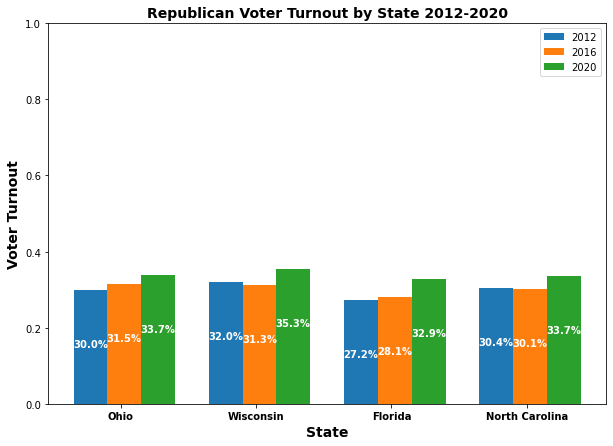

In [96]:
fig3, ax3 = plt.subplots(figsize=(10,7))
x = np.arange(4)
rec1 = ax3.bar(x,tbs_gop_toplot1['2012'],width=0.25,label='2012')
rec2 = ax3.bar(x+0.25,tbs_gop_toplot1['2016'],width=0.25,label='2016')
rec3 = ax3.bar(x+0.5,tbs_gop_toplot1['2020'],width=0.25,label='2020')
ax3.set_xticks([r +.225 for r in range(4)])
ax3.set_xticklabels(tbs_gop_toplot1.index,fontweight='bold')
ax3.set_title('Republican Voter Turnout by State 2012-2020',fontsize=14,fontweight='bold')
ax3.set_ylim([0,1])
ax3.set_xlabel('State',fontsize=14,fontweight='bold')
ax3.set_ylabel('Voter Turnout',fontsize=14,fontweight='bold')
ax3.legend()

for i,v in enumerate(tbs_gop_toplot1['2012']):
    ax3.text(i-0.13, v-0.15, str(round(v*100,1))+'%', color='white', fontweight='bold')

for i,v in enumerate(tbs_gop_toplot1['2016']):
    ax3.text(i-0.13+0.25, v-0.15, str(round(v*100,1))+'%', color='white', fontweight='bold')

for i,v in enumerate(tbs_gop_toplot1['2020']):
    ax3.text(i-0.13+0.5, v-0.15, str(round(v*100,1))+'%', color='white', fontweight='bold')

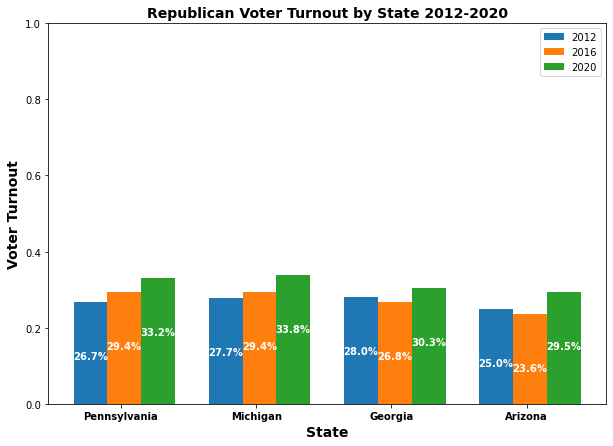

In [97]:
fig3, ax3 = plt.subplots(figsize=(10,7))
x = np.arange(4)
rec1 = ax3.bar(x,tbs_gop_toplot2['2012'],width=0.25,label='2012')
rec2 = ax3.bar(x+0.25,tbs_gop_toplot2['2016'],width=0.25,label='2016')
rec3 = ax3.bar(x+0.5,tbs_gop_toplot2['2020'],width=0.25,label='2020')
ax3.set_xticks([r +.225 for r in range(4)])
ax3.set_xticklabels(tbs_gop_toplot2.index,fontweight='bold')
ax3.set_title('Republican Voter Turnout by State 2012-2020',fontsize=14,fontweight='bold')
ax3.set_ylim([0,1])
ax3.set_xlabel('State',fontsize=14,fontweight='bold')
ax3.set_ylabel('Voter Turnout',fontsize=14,fontweight='bold')
ax3.legend()

for i,v in enumerate(tbs_gop_toplot2['2012']):
    ax3.text(i-0.13, v-0.15, str(round(v*100,1))+'%', color='white', fontweight='bold')

for i,v in enumerate(tbs_gop_toplot2['2016']):
    ax3.text(i-0.13+0.25, v-0.15, str(round(v*100,1))+'%', color='white', fontweight='bold')

for i,v in enumerate(tbs_gop_toplot2['2020']):
    ax3.text(i-0.13+0.5, v-0.15, str(round(v*100,1))+'%', color='white', fontweight='bold')

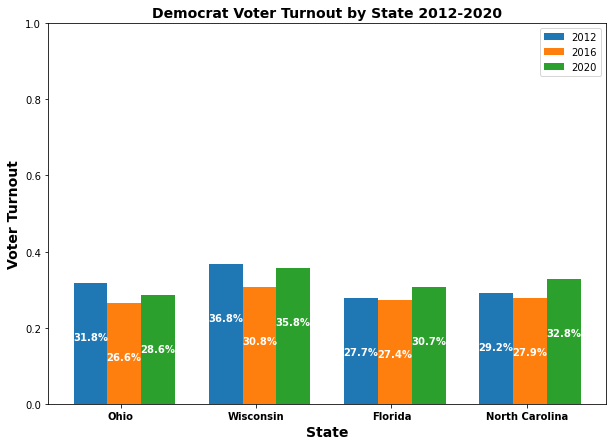

In [98]:
fig3, ax3 = plt.subplots(figsize=(10,7))
x = np.arange(4)
rec1 = ax3.bar(x,tbs_dem_toplot1['2012'],width=0.25,label='2012')
rec2 = ax3.bar(x+0.25,tbs_dem_toplot1['2016'],width=0.25,label='2016')
rec3 = ax3.bar(x+0.5,tbs_dem_toplot1['2020'],width=0.25,label='2020')
ax3.set_xticks([r +.225 for r in range(4)])
ax3.set_xticklabels(tbs_dem_toplot1.index,fontweight='bold')
ax3.set_title('Democrat Voter Turnout by State 2012-2020',fontsize=14,fontweight='bold')
ax3.set_ylim([0,1])
ax3.set_xlabel('State',fontsize=14,fontweight='bold')
ax3.set_ylabel('Voter Turnout',fontsize=14,fontweight='bold')
ax3.legend()

for i,v in enumerate(tbs_dem_toplot1['2012']):
    ax3.text(i-0.13, v-0.15, str(round(v*100,1))+'%', color='white', fontweight='bold')

for i,v in enumerate(tbs_dem_toplot1['2016']):
    ax3.text(i-0.13+0.25, v-0.15, str(round(v*100,1))+'%', color='white', fontweight='bold')

for i,v in enumerate(tbs_dem_toplot1['2020']):
    ax3.text(i-0.13+0.5, v-0.15, str(round(v*100,1))+'%', color='white', fontweight='bold')

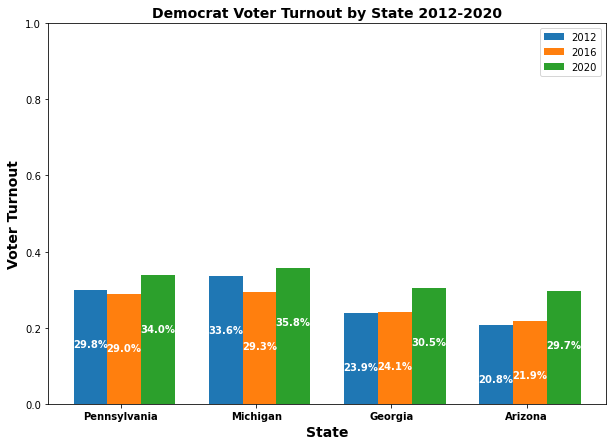

In [99]:
fig3, ax3 = plt.subplots(figsize=(10,7))
x = np.arange(4)
rec1 = ax3.bar(x,tbs_dem_toplot2['2012'],width=0.25,label='2012')
rec2 = ax3.bar(x+0.25,tbs_dem_toplot2['2016'],width=0.25,label='2016')
rec3 = ax3.bar(x+0.5,tbs_dem_toplot2['2020'],width=0.25,label='2020')
ax3.set_xticks([r +.225 for r in range(4)])
ax3.set_xticklabels(tbs_dem_toplot2.index,fontweight='bold')
ax3.set_title('Democrat Voter Turnout by State 2012-2020',fontsize=14,fontweight='bold')
ax3.set_ylim([0,1])
ax3.set_xlabel('State',fontsize=14,fontweight='bold')
ax3.set_ylabel('Voter Turnout',fontsize=14,fontweight='bold')
ax3.legend()

for i,v in enumerate(tbs_dem_toplot2['2012']):
    ax3.text(i-0.13, v-0.15, str(round(v*100,1))+'%', color='white', fontweight='bold')

for i,v in enumerate(tbs_dem_toplot2['2016']):
    ax3.text(i-0.13+0.25, v-0.15, str(round(v*100,1))+'%', color='white', fontweight='bold')

for i,v in enumerate(tbs_dem_toplot2['2020']):
    ax3.text(i-0.13+0.5, v-0.15, str(round(v*100,1))+'%', color='white', fontweight='bold')

In [74]:
cvt = pd.DataFrame(tbs_gop_toplot['2020dif']).join(tbs_dem_toplot['2020dif'],how='left',rsuffix='_dem')
cvt.columns = ['gop','dem']

In [100]:
cvt['dif'] = cvt['dem']-cvt['gop']
cvt = cvt.sort_values('dif')
cvt1 = cvt.loc[['Ohio','Wisconsin','Florida','North Carolina']]
cvt2 = cvt.loc[['Pennsylvania','Michigan','Georgia','Arizona']]
cvt

,gop,dem,dif
state,,,
Florida,0.048012,0.033324,-0.014688
Ohio,0.022350,0.020241,-0.002109
Wisconsin,0.040220,0.049748,0.009527
Pennsylvania,0.037891,0.050221,0.012330
North Carolina,0.036393,0.049345,0.012952
Arizona,0.058663,0.077713,0.019050
Michigan,0.043983,0.065022,0.021039
Georgia,0.035362,0.064016,0.028654


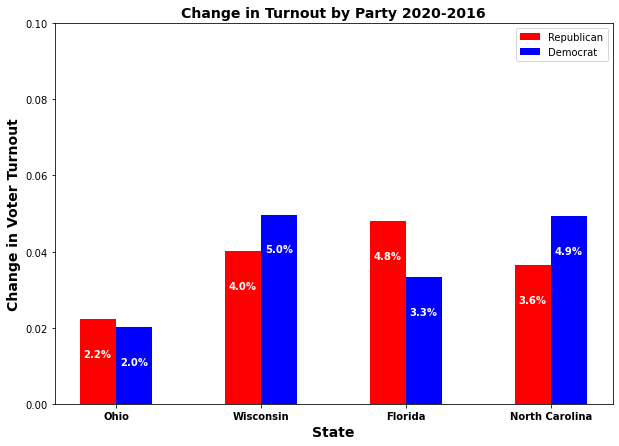

In [101]:
fig3, ax3 = plt.subplots(figsize=(10,7))
x = np.arange(4)
rec1 = ax3.bar(x,cvt1['gop'],width=0.25,label='Republican',color='red')
rec2 = ax3.bar(x+0.25,cvt1['dem'],width=0.25,label='Democrat',color='blue')
ax3.set_xticks([r +.125 for r in range(4)])
ax3.set_xticklabels(cvt1.index,fontweight='bold')
ax3.set_title('Change in Turnout by Party 2020-2016',fontsize=14,fontweight='bold')
ax3.set_ylim([0,.1])
ax3.set_xlabel('State',fontsize=14,fontweight='bold')
ax3.set_ylabel('Change in Voter Turnout',fontsize=14,fontweight='bold')
ax3.legend()

for i,v in enumerate(cvt1['gop']):
    ax3.text(i-.1, v-.01, str(round(v*100,1))+'%', color='white', fontweight='bold')

for i,v in enumerate(cvt1['dem']):
    ax3.text(i-.1+0.25, v-.01, str(round(v*100,1))+'%', color='white', fontweight='bold')

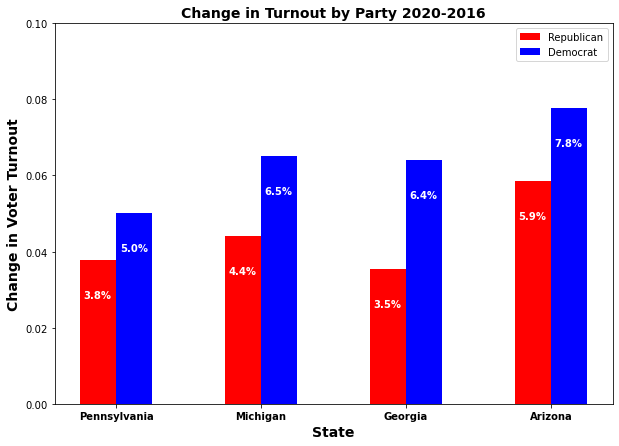

In [102]:
fig3, ax3 = plt.subplots(figsize=(10,7))
x = np.arange(4)
rec1 = ax3.bar(x,cvt2['gop'],width=0.25,label='Republican',color='red')
rec2 = ax3.bar(x+0.25,cvt2['dem'],width=0.25,label='Democrat',color='blue')
ax3.set_xticks([r +.125 for r in range(4)])
ax3.set_xticklabels(cvt2.index,fontweight='bold')
ax3.set_title('Change in Turnout by Party 2020-2016',fontsize=14,fontweight='bold')
ax3.set_ylim([0,.1])
ax3.set_xlabel('State',fontsize=14,fontweight='bold')
ax3.set_ylabel('Change in Voter Turnout',fontsize=14,fontweight='bold')
ax3.legend()

for i,v in enumerate(cvt2['gop']):
    ax3.text(i-.1, v-.01, str(round(v*100,1))+'%', color='white', fontweight='bold')

for i,v in enumerate(cvt2['dem']):
    ax3.text(i-.1+0.25, v-.01, str(round(v*100,1))+'%', color='white', fontweight='bold')

In [118]:
turnout_by_county['dem_per'] = turnout_by_county['dem'] / turnout_by_county['total']
turnout_by_county['gop_per'] = turnout_by_county['gop'] / turnout_by_county['total']
county_pchanges = turnout_by_county[['total','dem','gop','dem_per','gop_per']]

In [123]:
county_pchanges = county_pchanges.unstack()
county_pchanges.to_csv('county_pchanges.csv')

In [126]:
turnout_by_state['dem_per'] = turnout_by_state['dem'] / turnout_by_state['total']
turnout_by_state['gop_per'] = turnout_by_state['gop'] / turnout_by_state['total']
state_pchanges = turnout_by_state[['total','dem','gop','dem_per','gop_per']]

In [127]:
state_pchanges = state_pchanges.unstack()
state_pchanges.to_csv('state_pchanges.csv')

In [132]:
turnout_by_county

total    dem    gop  AGE18PLUS_TOT  \
state     county           year                                       
Arizona   APACHE COUNTY    2012  25848  17147   8250          50581   
                           2016  27661  17083   8240          51444   
                           2020  35172  23293  11442          52462   
          COCHISE COUNTY   2012  49003  18546  29497         102516   
                           2016  50015  17450  28092          98115   
...                                ...    ...    ...            ...   
Wisconsin WINNEBAGO COUNTY 2016  87144  37054  43448         134431   
                           2020  94032  44060  47795         136902   
          WOOD COUNTY      2012  38900  18581  19704          57894   
                           2016  37800  14232  21503          57392   
                           2020  41196  16360  24306          57247   

                                 repturnout  demturnout   turnout winner  \
state     county           year                                            
Arizona   APACHE COUNTY    2012    0.163105    0.339001  0.511022   blue   
                           2016    0.160174    0.332070  0.537691   blue   
                           2020    0.218101    0.443998  0.670428   blue   
          COCHISE COUNTY   2012    0.287731    0.180908  0.478003    red   
                           2016    0.286317    0.177853  0.509759    red   
...                                     ...         ...       ...    ...   
Wisconsin WINNEBAGO COUNTY 2016    0.323199    0.275636  0.648243    red   
                           2020    0.349118    0.321836  0.686856    red   
          WOOD COUNTY      2012    0.340346    0.320949  0.671918    red   
                           2016    0.374669    0.247979  0.658628    red   
                           2020    0.424581    0.285779  0.719618    red   

                                  dem_per   gop_per  
state     county           year                      
Arizona   APACHE COUNTY    2012  0.663378  0.319174  
                           2016  0.617584  0.297892  
                           2020  0.662260  0.325316  
          COCHISE COUNTY   2012  0.378467  0.601943  
                           2016  0.348895  0.561671  
...                                   ...       ...  
Wisconsin WINNEBAGO COUNTY 2016  0.425204  0.498577  
                           2020  0.468564  0.508284  
          WOOD COUNTY      2012  0.477661  0.506530  
                           2016  0.376508  0.568862  
                           2020  0.397126  0.590009  

[1953 rows x 10 columns]

In [136]:
reg_voters = pd.read_csv('registered_voters.csv')

In [137]:
reg_voters.columns=['state','county','year','reg_voters']

In [138]:
reg_voters.set_index(['state','county','year'],inplace=True)

In [139]:
reg_voters

reg_voters
state     county           year            
Arizona   APACHE COUNTY    2020       51906
          COCHISE COUNTY   2020       82022
          COCONINO COUNTY  2020       90669
          GILA COUNTY      2020       34001
          GRAHAM COUNTY    2020       19851
...                                     ...
Wisconsin WAUKESHA COUNTY  2020      291183
          WAUPACA COUNTY   2020       31369
          WAUSHARA COUNTY  2020       14465
          WINNEBAGO COUNTY 2020      104233
          WOOD COUNTY      2020       45206

[651 rows x 1 columns]

In [141]:
turnout_by_county = turnout_by_county.join(reg_voters,how='left')

In [147]:
turnout_by_county.to_csv('turnout_by_county.csv')